In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
import numpy as np
from IPython.display import display
import glob
import os
import cv2
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt
from imutils.video import VideoStream
import imutils
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
model = load_model('/content/drive/MyDrive/FaceMaskDetection/model_cnn.h5')
prototxt_path = "/content/drive/MyDrive/FaceMaskDetection/detector/deploy.prototxt"
weight_path = "/content/drive/MyDrive/FaceMaskDetection/detector/res10_300x300_ssd_iter_140000.caffemodel"
faceNet = cv2.dnn.readNet(prototxt_path, weight_path)

In [ ]:
def detectMask(pic, faceNet, maskNet):
  (h, w) = pic.shape[:2]
  blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),(104.0, 177.0, 123.0))

  # size = 4

  faceNet.setInput(blob)
  detections = faceNet.forward()
  
  for i in range(0, detections.shape[2]):
    box = detections[0, 0, 0, 3:7] * np.array([w, h, w, h])
    (startX, startY, endX, endY) = box.astype("int")

    (startX, startY) = (max(0, startX), max(0, startY))
    (endX, endY) = (min(w - 1, endX), min(h - 1, endY))

    # mini = cv2.resize(im, (im.shape[1] // size, im.shape[0] // size))

    face = image[startY:endY, startX:endX]
    # face = cv2.resize(face, (face.shape[1] // size, face.shape[0] // size))
    face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
    face = cv2.resize(face, (224, 224))
    img = np.array(face, dtype='float')
    img = img.reshape(1, 224, 224, 3)

    preds = maskNet.predict(img)
    # print(status)
    # (startX, startY, endX, endY) = locs
    result = preds

    color = (0, 255, 0)
    status =" Wearing Mask"
    if (result == 1):
      status =" Not Wearing Mask"
      color = (0, 0, 255)

    font = cv2.FONT_HERSHEY_DUPLEX

    stroke = 1
    cv2.putText(image, status, (startX, startY - 10), font, 0.5, color, stroke, cv2.LINE_AA)

    stroke = 2
    cv2.rectangle(image, (startX, startY), (endX, endY), color, stroke)

  return image

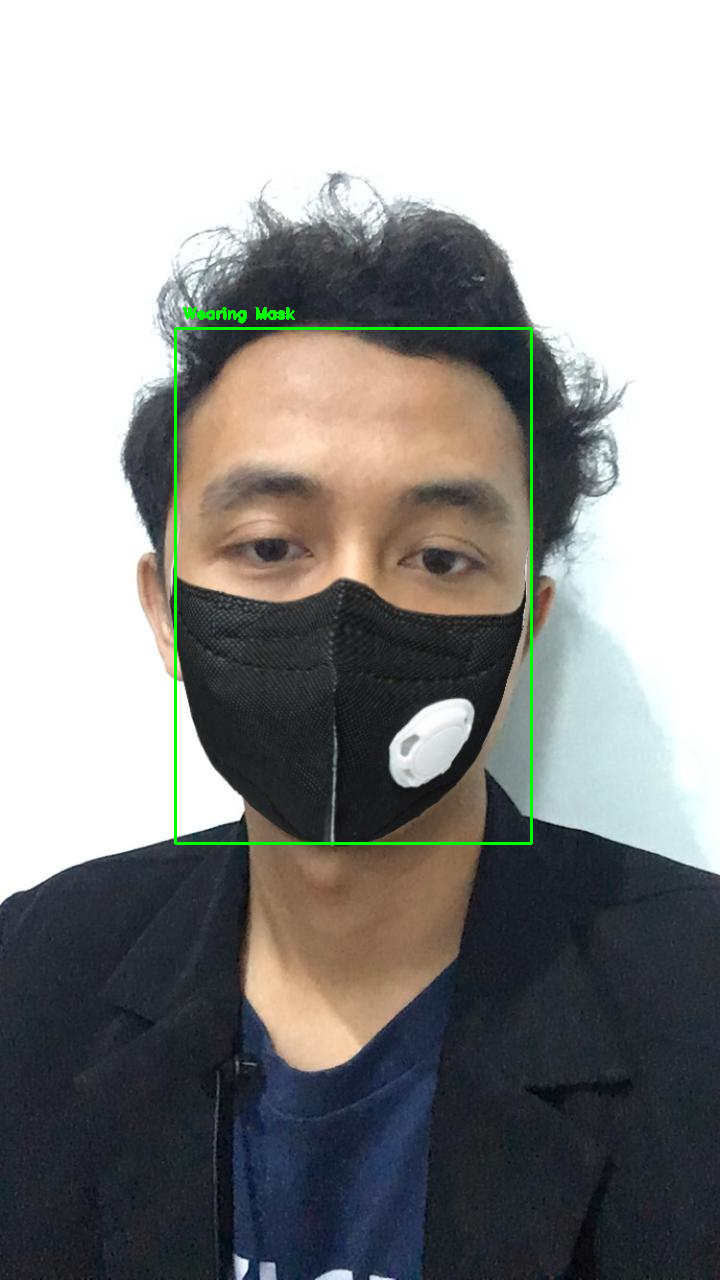

In [ ]:
image = cv2.imread('/content/img4.jpeg')

image = imutils.resize(image)

image = detectMask(image, faceNet, model)

cv2_imshow(image)